In [1]:
!cd D:\workspace\Jupyter\exp_45.2_whatsapp\soan_master\whatsapp
!del /s /q *.pyc

The device is not ready.


Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\colors\__pycache__\colors.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\colors\__pycache__\__init__.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\scripts\__pycache__\import_data_script.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\scripts\__pycache__\number_of_words_script.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\scripts\__pycache__\preprocess_data_script.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\scripts\__pycache__\__init__.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\__pycache__\general.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_master\whatsapp\__pycache__\helper.cpython-37.pyc
Deleted file - E:\Workspace\Jupyter\e2_whatsapp_soan\soan_m

In [77]:
import matplotlib
import matplotlib.pyplot as plt
# Without "%matplotlib inline", you get error "Javascript Error: IPython is not defined" in JupyterLab.
%matplotlib inline 
# For scrollable output image
%matplotlib nbagg

from collections import Counter
from dateutil.parser import parse

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *

from joblib import load, dump
import os
import json

In [49]:
print("nltk", nltk.__version__)
print("matplotlib", matplotlib.__version__)
# https://www.nltk.org/news.html
# http://lascam.facom.ufu.br:8080/cookbooks/cookbook.jsp?api=nltk

nltk 3.5
matplotlib 3.0.2


In [5]:
from soan_master.whatsapp.scripts import import_data_script as ids
from soan_master.whatsapp.scripts import preprocess_data_script as pds
from soan_master.whatsapp.scripts import number_of_words_script as nows

In [24]:
file_name_1 = "WhatsApp Chat with Cousins (201910-201912).txt"
file_name_2 = "WhatsApp Chat with BITS Lounge (New).txt"

#df = ids.import_data(file_name_2, os.path.join(os.getcwd(), 'files_1', 'file_output').replace("\\", "/")) 

file_name = os.listdir(os.path.join(os.getcwd(), 'files_1', 'file_output'))[-1]
df = ids.import_data(file_name, os.path.join(os.getcwd(), 'files_1', 'file_output')) 
print("Input file is: ", file_name)

Input file is:  WhatsApp Chat with BITS Lounge 1598283298.txt


In [25]:
df = pds.preprocess_data(df = df)

In [26]:
all_text = ' '.join(list(df.Message_Only_Text.values))

In [27]:
words = nltk.tokenize.word_tokenize(all_text)

In [80]:
%%time 

path_to_stop_words = "E:/Workspace/Jupyter/e2_whatsapp_soan/soan_master/whatsapp"

swl = list(set(stopwords.words('english')))
    
with open(os.path.join(path_to_stop_words, 'stop_words.json'), encoding='utf-8') as json_file:
    stop_words = json.load(json_file)

for lang in stop_words.keys():
    swl += list(set(stop_words[lang]))

filtered_words = list(set([word for word in words if word not in swl and not ('https' in word and len(word) > 5)]))

Wall time: 1.42 s


In [65]:
dump(filtered_words, 'files_1/joblib/filtered_words.joblib')

['files_1/joblib/filtered_words.joblib']

In [66]:
fdist1 = FreqDist(words)
fdist2 = FreqDist(filtered_words)

In [67]:
#fdist.keys()

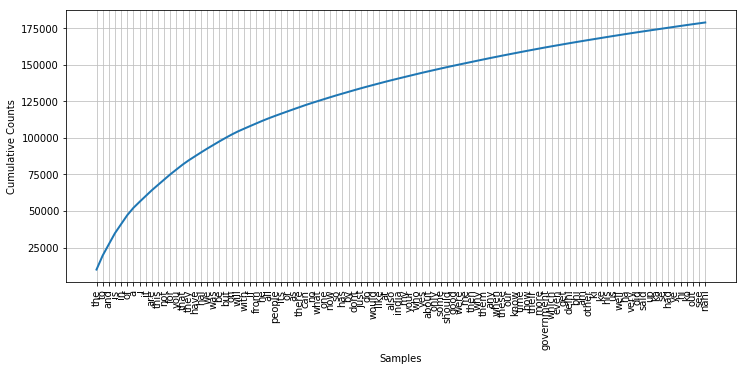

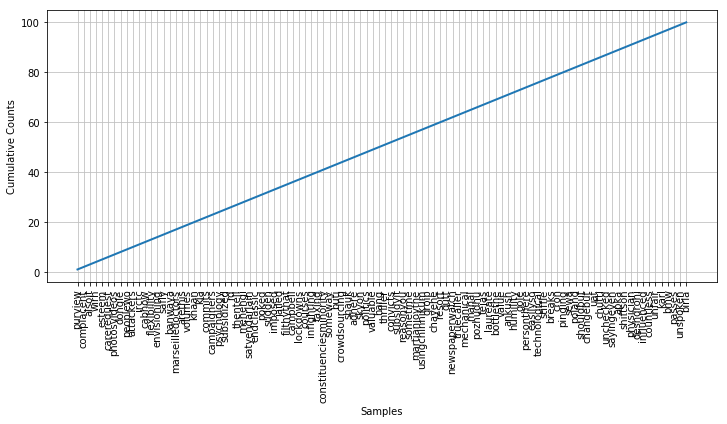

In [68]:
%matplotlib inline
fig = plt.figure(figsize=(12,5))
fdist1.plot(100, cumulative=True)
fig = plt.figure(figsize=(12,5))
plt.xticks(rotation = 70)
fdist2.plot(100, cumulative=True)

In [69]:
text = nltk.Text(words)

In [82]:
text.collocation_list(5)

[('toi', 'app'),
 ('app', 'nowhttpstimesofindiaonelinkmeefrtinstalltoi'),
 ('dont', 'know'),
 ('lets', 'see'),
 ('take', 'care')]

In [70]:
text.collocations(5)

toi app; app nowhttpstimesofindiaonelinkmeefrtinstalltoi; dont know;
lets see; take care


In [71]:
from io import StringIO 
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [72]:
with Capturing() as output:
    print('hello world')

print('displays on screen')

# Note: the constructor argument
with Capturing(output) as output:  
    print('hello world2')

print('done')
print('output:', output)

displays on screen
done
output: ['hello world', 'hello world2']


In [73]:
collocation_list = []
with Capturing() as collocation_list:  # note the constructor argument
    text.collocations()
collocation_list = ' '.join(collocation_list).split('; ')
print(collocation_list)
print(len(collocation_list))

['toi app', 'app nowhttpstimesofindiaonelinkmeefrtinstalltoi', 'dont know', 'lets see', 'take care', 'looks like', 'amit shah', 'shaheen bagh', 'supreme court', 'middle class', 'social media', 'nahi hai', 'rahul gandhi', 'contact tracing', 'kapil mishra', 'social distancing', 'raha hai', 'illegal immigrants', 'dont think', 'hota hai']
20


In [74]:
text.collocations()

toi app; app nowhttpstimesofindiaonelinkmeefrtinstalltoi; dont know;
lets see; take care; looks like; amit shah; shaheen bagh; supreme
court; middle class; social media; nahi hai; rahul gandhi; contact
tracing; kapil mishra; social distancing; raha hai; illegal
immigrants; dont think; hota hai


In [75]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [78]:
finder = TrigramCollocationFinder.from_words(text)

In [79]:
finder.nbest(trigram_measures.pmi, 10) 

[('aadharpanvoter', 'idcommunity', 'certificateration'),
 ('aatmaaa', 'nirbhaaar', 'telngana'),
 ('academician', 'pervez', 'hoodbhoy'),
 ('acetaldehyde', 'chlorine', 'ethylene'),
 ('achal',
  'gautam',
  'httpswwwquoracomhowhasthemodigovernmentchangedthedynamicsofindiachinarelationsanswereaeaaeabeaeaceaaeaaeachalgautamchshareaesriduiimf'),
 ('actiona', 'parathaassembly', 'linewith'),
 ('adarashwadi', 'jodidar', 'laut'),
 ('adathodai', 'elaiajwain', 'karpooravallikusta'),
 ('addpepsi', 'liril', 'gillette'),
 ('ahmad', 'faraz', 'wasipresent')]